---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [1]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib notebook
    import matplotlib.pyplot as plt
    
    plt.figure()
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

<IPython.core.display.Javascript object>


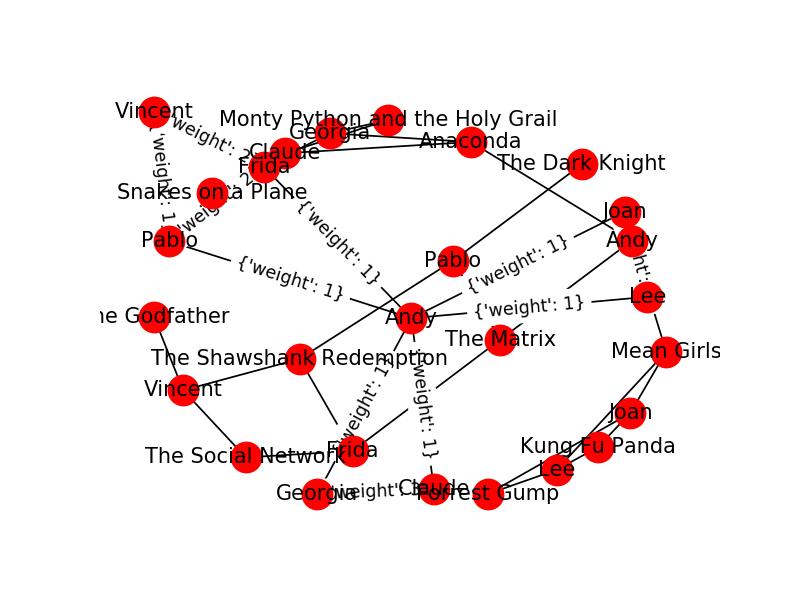

In [2]:
def answer_one():
        
    B = nx.read_edgelist('Employee_Movie_Choices.txt',delimiter='\t')
    
    return B
plot_graph(answer_one())

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [3]:
def answer_two():
    
    B = answer_one()
    
    for node in B.nodes():
        if node in employees:
            B.add_node(node, type='employee')
        elif node in movies:
            B.add_node(node, type='movie')
    
    return B
nx.get_node_attributes(answer_two(), 'type')

{'Anaconda': 'movie',
 'Andy': 'employee',
 'Claude': 'employee',
 'Forrest Gump': 'movie',
 'Frida': 'employee',
 'Georgia': 'employee',
 'Joan': 'employee',
 'Kung Fu Panda': 'movie',
 'Lee': 'employee',
 'Mean Girls': 'movie',
 'Monty Python and the Holy Grail': 'movie',
 'Pablo': 'employee',
 'Snakes on a Plane': 'movie',
 'The Dark Knight': 'movie',
 'The Godfather': 'movie',
 'The Matrix': 'movie',
 'The Shawshank Redemption': 'movie',
 'The Social Network': 'movie',
 'Vincent': 'employee'}

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [4]:
def answer_three():
        
    B = answer_two()
    
    gr = bipartite.weighted_projected_graph(B, employees)
    
    return gr

pos = nx.spring_layout(answer_three())
nx.draw(answer_three(), pos=pos, with_labels=True)
nx.draw_networkx_edge_labels(answer_three(), pos)

/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
/opt/conda/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
/opt/conda/lib/python3.6/site-packages/matplotlib/__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
/opt/conda/lib/python3.6/site-packages/matplotlib/rcsetup.py:152: UserWarning: axes.hold is deprecated, will be removed in 3.0
  warnings.warn("axes.hold is deprecated, will be removed in 3.0")


{('Andy', 'Claude'): <matplotlib.text.Text at 0x7fa058de2c50>,
 ('Andy', 'Frida'): <matplotlib.text.Text at 0x7fa058d6e320>,
 ('Andy', 'Georgia'): <matplotlib.text.Text at 0x7fa058d68b70>,
 ('Andy', 'Lee'): <matplotlib.text.Text at 0x7fa058de24e0>,
 ('Andy', 'Pablo'): <matplotlib.text.Text at 0x7fa058d68400>,
 ('Claude', 'Georgia'): <matplotlib.text.Text at 0x7fa058d6ea90>,
 ('Joan', 'Andy'): <matplotlib.text.Text at 0x7fa05b835be0>,
 ('Joan', 'Lee'): <matplotlib.text.Text at 0x7fa058e0ce10>,
 ('Pablo', 'Frida'): <matplotlib.text.Text at 0x7fa058d74240>,
 ('Vincent', 'Frida'): <matplotlib.text.Text at 0x7fa058ddad30>,
 ('Vincent', 'Pablo'): <matplotlib.text.Text at 0x7fa058dda5c0>}

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [5]:
def answer_four():
        
    emp_rel = nx.read_edgelist('Employee_Relationships.txt',data=[('relationship_score', int)])
    emp_rel_df = pd.DataFrame(emp_rel.edges(data=True),columns=['from','to','relationship_score'])
    
    mov = answer_three()
    mov_df = pd.DataFrame(mov.edges(data=True),columns=['from','to','movies_score'])
    
    mov_df_copy = mov_df.copy()
    mov_df_copy.rename(columns={'from':'X','to':'from'},inplace=True)
    mov_df_copy.rename(columns={'X':'to'},inplace=True)
    
    mov_df1 = pd.concat([mov_df,mov_df_copy])
    
    corr_df = pd.merge(mov_df1,emp_rel_df,on=['from','to'],how='right')
    corr_df['movies_score'] = corr_df['movies_score'].map(lambda x: x['weight'] if type(x)==dict else None)
    corr_df['relationship_score'] = corr_df['relationship_score'].map(
                                        lambda x: x['relationship_score'] if type(x)==dict else None)
    corr_df['movies_score'].fillna(value=0, inplace=True)
    
    return corr_df['relationship_score'].corr(corr_df['movies_score'])
answer_four()

0.78839622217334737